# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [109]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from skimage.color import rgb2gray
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [110]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

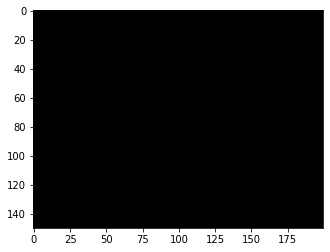

In [116]:
#Your solution
image = np.zeros((150,200), dtype=np.uint8)

plt.imshow(image, cmap='gray')

How many values can each pixel have in this case? 

In [112]:
#Your solution
print(2**8, "-> de 0 a 255")

256 -> de 0 a 255


b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

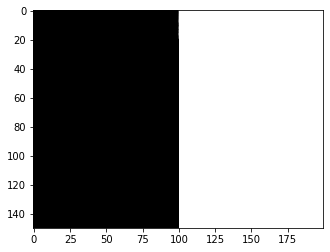

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 109 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255]


In [113]:
#Your solution
image[:, 0:100] = 0
image[:, 101:200] = 255

plt.imshow(image, cmap='gray')
plt.show()

# Valors de la primera fila
print(image[0])

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [114]:
#Your solution
io.imsave('images/image.bmp', image)

b) Load the saved image and visualize it:

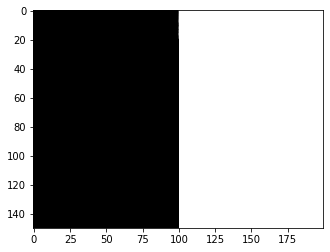

In [115]:
#Your solution
image2 = io.imread('images/image.bmp')

plt.imshow(image2, cmap='gray')
plt.show()

### 1.3 Images manipulation and image masks

a) Load and show the image lenna.jpg, and check its dimensions. Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. We recommend to create a bigger black image to later embed the original image in the central part.

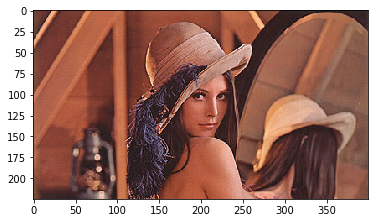

Dimensiones: (225, 400, 3)


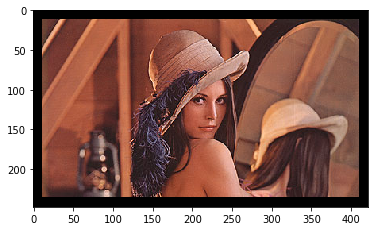

In [96]:
#Your solution
# Creem el fons negre
fondo = np.ones((248,422,3), dtype=np.uint8)

lenna = io.imread('images/lenna.jpg')

# Superposem lenna en el fons negre
fondo[11:236, 11:411] = lenna

# Mostrem
plt.imshow(lenna, cmap='gray')
plt.show()

# Dimensiones lenna
print("Dimensiones:", lenna.shape)

plt.imshow(fondo, cmap='gray')
plt.show()




b) Change the mask of the framed image to red. Visualize the three images with their respective titles.

Original:


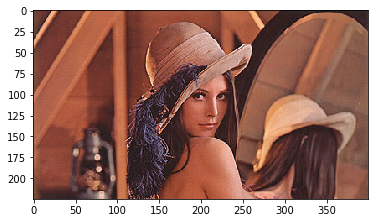

Fondo negro:


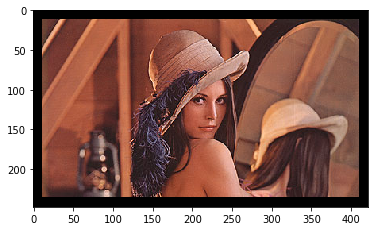

Fondo rojo:


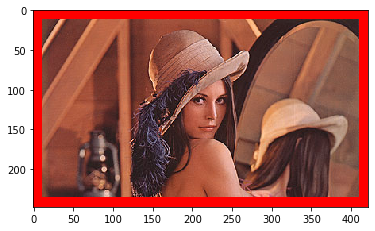

In [97]:
#Your solution
fondo_rojo = np.ones((248,422,3), dtype=np.uint8)

fondo_rojo[:] = [255, 0, 0]

lenna = io.imread('images/lenna.jpg')

# Superposem lenna en el fons vermell
fondo_rojo[11:236, 11:411] = lenna

print("Original:")

plt.imshow(lenna, cmap='gray')
plt.show()

print("Fondo negro:")

plt.imshow(fondo, cmap='gray')
plt.show()

print("Fondo rojo:")

plt.imshow(fondo_rojo, cmap='gray')
plt.show()

### 1.4 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

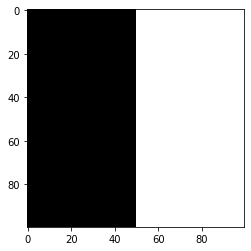

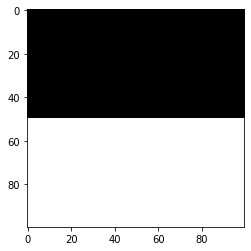

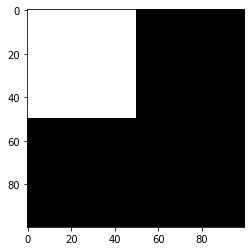

In [98]:
#Your solution
i1 = np.zeros((100, 100), np.uint8) 

# La meitat dreta serà blanca, la resta negre (np.zeros)
i1[:,50:] = 1

plt.imshow(i1, cmap = "gray")
plt.show()

i2 = np.zeros((100, 100), np.uint8) 

# La meitat inferior serà blanca
i2[50:,:] = 1

plt.imshow(i2, cmap = "gray")
plt.show()

i3 = np.zeros((100, 100), np.uint8) 

# La cantonada superior dreta serà blanca
i3[:50,:50] = 1

plt.imshow(i3, cmap = "gray")
plt.show()

b) Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

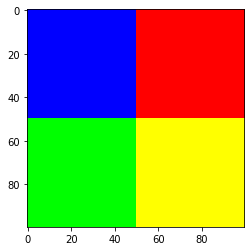

In [99]:
# Creem una matriu amb les característiques anteriors 
imgfinal = np.zeros((100,100,3),dtype='uint8')

# Obtenim els valors d'alçada i amplada
alcada = imgfinal.shape[0]
amplada = imgfinal.shape[1]

# Per a cada pixel.
for i in range(alcada):
    for j in range(amplada):
        
        # Afegim vermell.
        if i1[i][j] == 1:
            imgfinal[i][j] = (255,0,0) + imgfinal[i][j]
            
        # Afegim verd.
        if i2[i][j] == 1:
            imgfinal[i][j] = (0,255,0) + imgfinal[i][j]
        
        # Afegim blau.
        if i3[i][j] == 1:
            imgfinal[i][j] = (0,0,255) + imgfinal[i][j]

plt.imshow(imgfinal, cmap = "gray")
plt.show()


c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

Original:


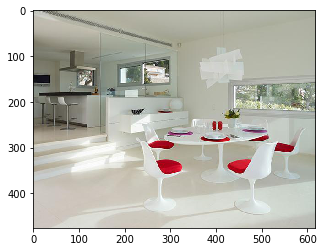

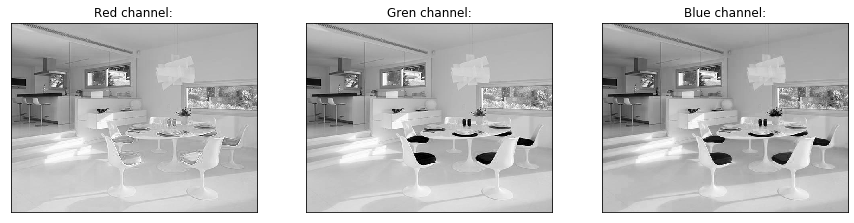

In [100]:
#Your solution
# Carreguem la imatge.
cadires = io.imread('images/sillas.jpg')

# Obtenim la shape de la imatge.
shape = cadires.shape

# Obtenim alcada i amplada.
alcada = cadires.shape[0]
amplada = cadires.shape[1] 

# Create quadrícula amb les caracterítiques anteriors. 
cadires_r = np.zeros(shape,dtype='uint8')
cadires_g = np.zeros(shape,dtype='uint8')
cadires_b = np.zeros(shape,dtype='uint8')

# Per a cada pixel.
for i in range(alcada):
    for j in range(amplada):
        
        # Afegim els colors .
        cadires_r[i][j] = (cadires[i][j][0],0,0)
        cadires_g[i][j] = (0,cadires[i][j][1],0) 
        cadires_b[i][j] = (0,0,cadires[i][j][2]) 
        
# Convertim a gray scale.
cadires_r = rgb2gray(cadires_r)
cadires_g = rgb2gray(cadires_g)
cadires_b = rgb2gray(cadires_b)

print("Original:")
plt.imshow(cadires)
plt.show()

cadir = [cadires_r, cadires_g, cadires_b]
titulo = ["Red channel:", "Gren channel:", "Blue channel:"]

# Creem subplot de les imatges.
f, axarr = plt.subplots(1, len(cadir))
f.set_size_inches(15, 15)

for i in range(len(cadir)):
    
    # Set imatge i titol.
    axarr[i].imshow(cadir[i], cmap = "gray")
    axarr[i].set_title(titulo[i])
        
    # Eliminem els vectors x i y.
    axarr[i].xaxis.set_visible(False)
    axarr[i].yaxis.set_visible(False)
    
plt.show()

### 1.5 Color image conversion

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

Dimensions (225, 400, 3)


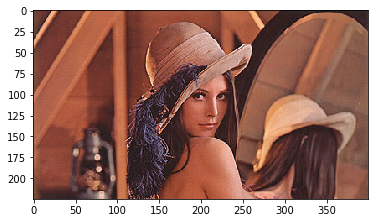

In [16]:
#Your solution
lenna = io.imread('images/lenna.jpg')
plt.imshow(lenna, cmap = "gray")
print("Dimensions", lenna.shape)

b) Convert the previous image to grayscale, visualize and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values.

RGB:


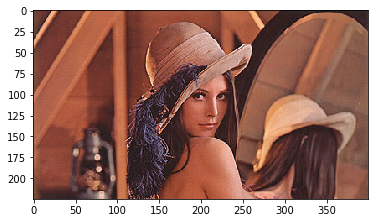

Greyscale:


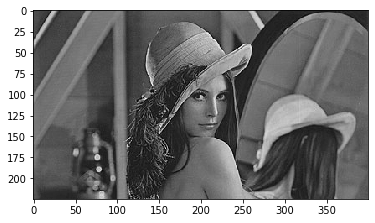

Shape:  (225, 400, 3)
Dtipe:  uint8
Max:  255
Min 0


In [20]:
#Your solution
print("RGB:")
plt.imshow(lenna)
plt.show()

lenna_gray = rgb2gray(lenna)
print("Greyscale:")
plt.imshow(lenna_gray, cmap='gray')
plt.show()

print("Shape: ", lenna.shape)
print("Dtipe: ", lenna.dtype)
print("Max: ", lenna.max())
print("Min", lenna.min())

c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

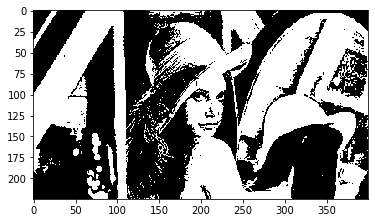

10th row:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 

In [23]:
#Your solution
lenna_binarized = io.imread('images/lenna.jpg')
plt.imshow(lenna_binarized)
lenna_binarized = lenna_binarized.mean(2)
plt.imshow(lenna_binarized, cmap='gray')

#Si el valor es menor que 100 serà igual a 0. D'altre banda, serà 1
lenna_binarized[lenna_binarized < 100] = 0
lenna_binarized[lenna_binarized >= 100] = 1


plt.imshow(lenna_binarized, cmap='gray')
plt.show()

print("10th row:\n", str(lenna_binarized[10]))

d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

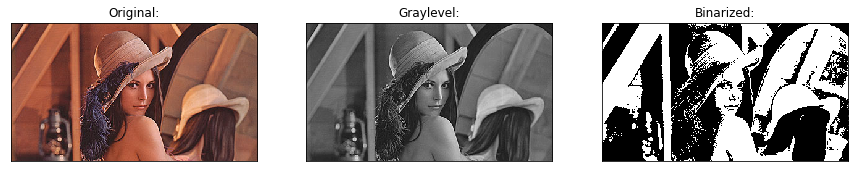

In [92]:
#Your solution
lennas = [lenna, lenna_gray, lenna_binarized]
titulo = ["Original:", "Graylevel:", "Binarized:"]

f, axarr = plt.subplots(1, len(lennas))
f.set_size_inches(15, 15)

for i in range(len(lennas)):
    
    axarr[i].imshow(lennas[i], cmap = "gray")
    axarr[i].set_title(titulo[i])
        
    axarr[i].xaxis.set_visible(False)
    axarr[i].yaxis.set_visible(False)
    
plt.show()

### 1.6 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

Note: When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default.

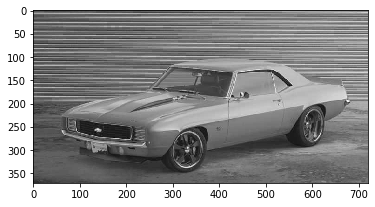

Min valor: 63
Max valor: 193


In [80]:
#Your solution

car = io.imread('images/car_lowContrast.jpg')
plt.imshow(car, cmap='gray')
plt.show()
print("Min valor: " + str(car.min()) + "\nMax valor: " + str(car.max()))

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

Dark Image:


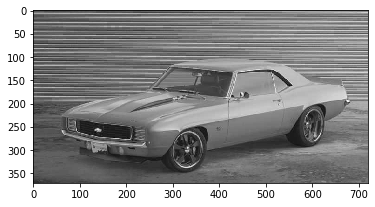

Min value: 0
Max value: 130


In [81]:
#Your solution
from skimage import exposure

print("Dark Image:")
dark_image = exposure.rescale_intensity(car, out_range = (0, car.max() - car.min()))
plt.imshow(dark_image, cmap = 'gray')
plt.show()
print("Min value: " + str(dark_image.min()) + "\nMax value: " + str(dark_image.max()))

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

Bright Image:


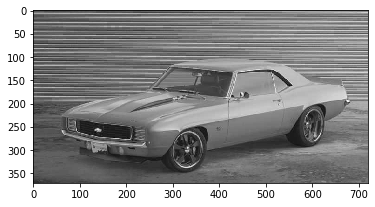

Min valor: 125
Max valor: 255


In [82]:
#Your solution
print("Bright Image:")
bright_im = exposure.rescale_intensity(car, out_range = (255 - (car.max() - car.min()), 255))
plt.imshow(bright_im, cmap = 'gray')
plt.show()
print("Min valor: " + str(bright_im.min()) + "\nMax valor: " + str(bright_im.max()))

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one. 

Implement the contrast enhancement using the two different available methods.

Abans de modificar:
Min valor: 63
Max valor: 193


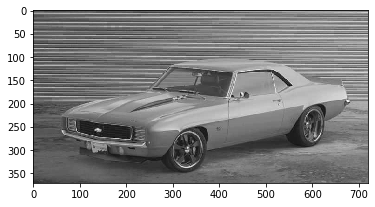


Després de modificar:
Min valor: 0
Max valor: 254


In [101]:
#Your solution
# Per manipulació directe
car_high_m = io.imread('images/car_lowContrast.jpg')
print("Abans de modificar:")
print("Min valor: " + str(car_high_m.min()) + "\nMax valor: " + str(car_high_m.max()))

# Calculem des de la dreta.
right = (float(255) - 127) / (car_high_m.max() - 127)

# Calculem des de l'esquerra.
left = float(127) / car_high_m.min()

# Valors alçada i amplada.
alcada = car_high_m.shape[0]
amplada = car_high_m.shape[1]

# Per a cada pixel
for i in range(alcada):
    for j in range(amplada):

        # Si el calor és inferior al del contrast
        if car_high_m[i][j] < 128:
            
            # Apliquem opció left
            car_high_m[i][j] = (car_high_m[i][j] - 63) * left 
            
        else:
            # Apliquem opció right
            car_high_m[i][j] = (((car_high_m[i][j] - 128) * right) + 128) 

plt.imshow(car_high_m, cmap = "gray")
plt.show()

print("\nDesprés de modificar:")
print("Min valor: " + str(car_high_m.min()) + "\nMax valor: " + str(car_high_m.max()))

Abans de modificar:
Min valor: 63
Max valor: 193


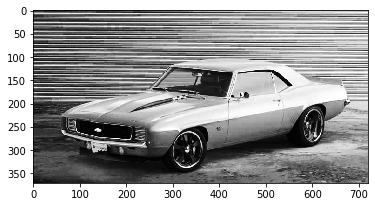

Després de modificar:
Min valor: 0
Max valor: 255


In [84]:
#Per comanda

car_high_s = io.imread('images/car_lowContrast.jpg')
print("Abans de modificar:")
print("Min valor: " + str(car_high_s.min()) + "\nMax valor: " + str(car_high_s.max()))

# Multiplies the value of each pixel in the histogram by 255.
car_highContrast = exposure.equalize_hist(car_high_s) * 255

# Show the image
plt.imshow(car_highContrast, cmap = "gray")
plt.show()

print("Després de modificar:")
print("Min valor: " + str(int(car_highContrast.min())) + "\nMax valor: " + str(int(car_highContrast.max())))

e) Visualize the 5 images in the same figure, each one with its corresponding title.

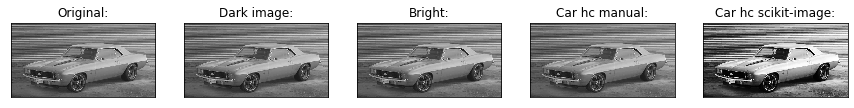

In [102]:
#Your solution
cars = [car, dark_image, bright_im, car_high_m, car_highContrast]
titulo = ["Original:", "Dark image:", "Bright:", "Car hc manual:", "Car hc scikit-image:"]

f, axarr = plt.subplots(1, len(cars))
f.set_size_inches(15, 15)

for i in range(len(cars)):
    
    axarr[i].imshow(cars[i], cmap = "gray")
    axarr[i].set_title(titulo[i])
        
    axarr[i].xaxis.set_visible(False)
    axarr[i].yaxis.set_visible(False)
    
plt.show()

### 1.7 Masks and logical image manipulation

a) Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

Original image:


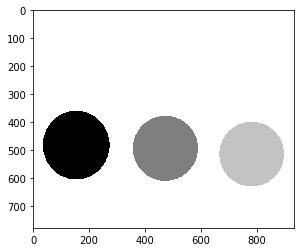

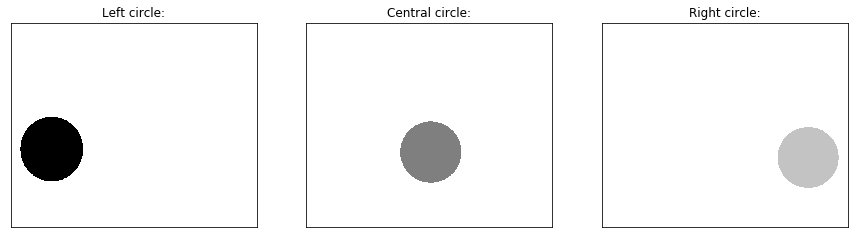

In [103]:
#Your solution
circulo = io.imread('images/circles.bmp')

circulo_gris = rgb2gray(circulo)

print("Original image:")
plt.imshow(circulo_gris, cmap = "gray")
plt.show()

colors = np.unique(circulo_gris) 

circulo1 = circulo_gris.copy()
circulo2 = circulo_gris.copy()
circulo3 = circulo_gris.copy()    

circulo = [circulo1, circulo2, circulo3]
titulo = ["Left circle:", "Central circle:", "Right circle:"]

for i in range(len(colors) - 1):
    circulo[i][circulo_gris != colors[i]] = 1
    
f, axarr = plt.subplots(1, len(circulo))
f.set_size_inches(15, 15)

for i in range(len(circulo)):
    
    axarr[i].imshow(circulo[i], cmap = 'gray', vmin = 0, vmax = 1)
    axarr[i].set_title(titulo[i])
        
    axarr[i].xaxis.set_visible(False)
    axarr[i].yaxis.set_visible(False)

b) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

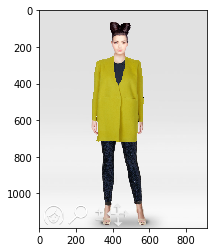

In [105]:
#Your solution
coat = io.imread('images/coat.png')
model = io.imread('images/model.png')

alcada = model.shape[0]
amplada = model.shape[1]

# Creuem l'arrai de files a columnes
for i in range(alcada):
    for j in range(amplada):
        
        # Agafem el coat de la primera imatge, ja que és l'únic que té només pixels diferents a 0
        if (coat[i][j][0] != 0) and (coat[i][j][1] != 0) and (coat[i][j][2] != 0):
            
            # Posem les coordenades a la imatge coat, ja que tenen la mateixa posició i tamany
            model[i][j] =  coat[i][j]
            
plt.imshow(model, cmap = "gray", vmin = 0, vmax = 1)
plt.show()

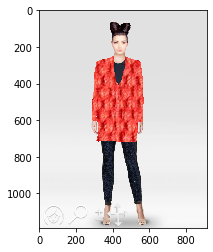

In [106]:
# Load the images.
coat = io.imread('images/coat.png')
model = io.imread('images/model.png')
texture2 = io.imread('images/texture2.png')

# Get the valules of the width and the height of the image.
height = model.shape[0]
width = model.shape[1]

# Creuem l'arrai de files a columnes
for i in range(height):
    for j in range(width):
        
        # Agafem el coat de la primera imatge, ja que és l'únic que té només pixels diferents a 0
        if (coat[i][j][0] != 0) and (coat[i][j][1] != 0) and (coat[i][j][2] != 0):
            
            # Apliquem la textura
            for x in range(3): 
                model[i][j][x] =  texture2[i][j][x]
                
plt.imshow(model, cmap = "gray", vmin = 0, vmax = 1)
plt.show()

## Delivery

Compressed file **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): September 28, 11:00 p.m.** 